In [1]:
user = "Alex"
pathtorepo = "C:\\Users\\" * user * "\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include("C:\\Users\\" * user * "\\Desktop\\dynamical-systems\\system.jl")
include("C:\\Users\\" * user * "\\Desktop\\dynamical-systems\\visual_regimes.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems
E, x, y  = -40..40, -5..5,  -5..5
box = E × x × y
using CairoMakie, GLMakie
using LinearAlgebra

In [3]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [4]:
time = 1000; tt = 1000; tstep = 0.001; times = [time, tt]
integ_set = (alg = Vern9(), adaptive = false, dt = tstep);

In [33]:
# chaotic non hom I0 = -1.7005; U0 = 0.26505

I0 = -1.7158; U0 = 0.2661

p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0_1 = [8.323740998226937, 0.7337119691329639, 0.44022359183603416];

In [34]:
ds = CoupledODEs(TM, u0_1, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.2661, 0.305, 0.3, -1.7158]
 time:          0.0
 state:         [8.323740998226937, 0.7337119691329639, 0.44022359183603416]


In [35]:
lyapunovspectrum(ds, 1000)

3-element Vector{Float64}:
  0.0009464071932426207
 -0.41485107678514505
 -4.15779006251976

In [36]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);

In [37]:
idx = 1
Jac = jacob_TM_(fp[idx], p, 0)
eivecs = eigvecs(Jac)
shift = real(eivecs[:, 1])*1e-7 + fp[idx]

3-element SVector{3, Float64} with indices SOneTo(3):
 8.338541123468369
 0.7384374106487414
 0.4380189153857953

In [38]:
prob = ODEProblem(TM, u0_1, (0.0, 1000), p)
sol = solve(prob, alg = Vern9(), adaptive = false, dt = 0.001);

In [39]:
println("Length: $(length(sol))")

Length: 1000002


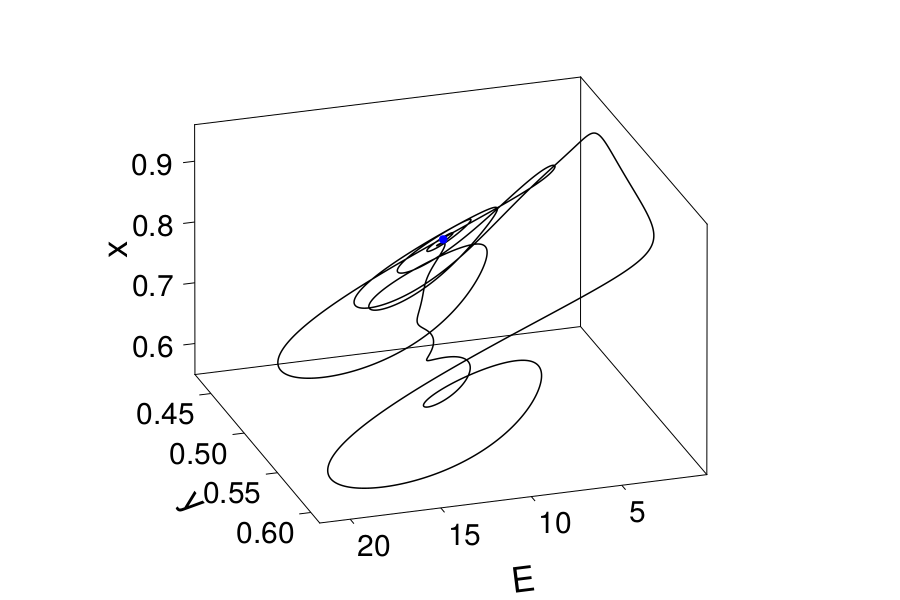

CairoMakie.Screen{IMAGE}


In [40]:
ts, tf = 400000, 500000
idx, idy, idz = 1, 3, 2
lb_size = 35; tck_size = 30;
dis  = 60;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1], azimuth = 0.4pi,
            xlabel = "E", ylabel = "y", zlabel = "x",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis)

lines!(sol[idx,ts:tf], sol[idy,ts:tf], sol[idz,ts:tf],
    linewidth = 1.5, color = :black)

#lines!(sol_cyc[idx,ts:tf], sol_cyc[idy,ts:tf], sol_cyc[idz,ts:tf],
    #inewidth = 1.5, color = :deeppink)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :blue, markersize = 12)
end

display(f)

In [22]:
#save("C:\\Users\\Alex\\Desktop\\phase_second_type_activity.eps", f)

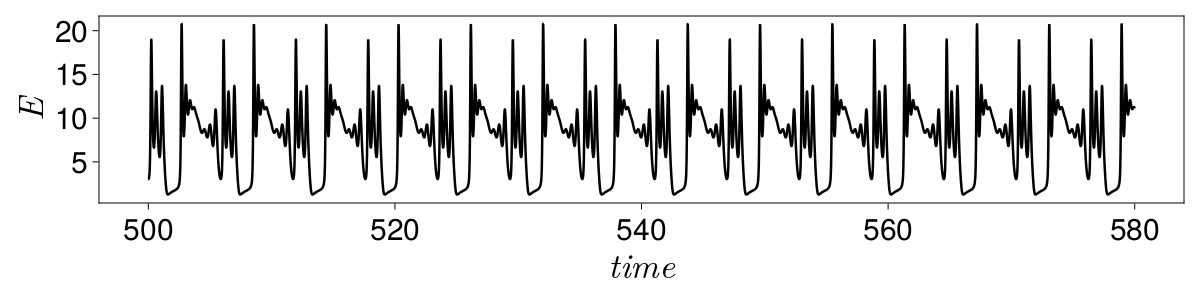

In [23]:
ts, tf = 500000, 580000 # 300000, 500000 # 410000, 430000
f = Figure(resolution = (1200, 300))
axistm = Axis(f[1, 1], xlabel = L"$time$", ylabel = L"$E$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)

lines!(axistm, sol.t[ts:tf], sol[1, ts:tf], linewidth = 2.5, color = :black)
f

In [24]:
#save("C:\\Users\\Alex\\Desktop\\ts_second_type_activity.eps", f)